In [5]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# data directoryC
DATA_DIR = '.'
data_paths = {
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv'),
                    'ind_train':os.path.join(DATA_DIR, 'C', 'C_indiv_train.csv'),
                    'ind_test':os.path.join(DATA_DIR, 'C', 'C_indiv_test.csv')
                   }}
                                          
                                          
                
# load training data
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')
c_train_ind=pd.read_csv(data_paths['C']['ind_train'], index_col='id')

# load test data
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')
c_test_ind = pd.read_csv(data_paths['C']['ind_test'], index_col='id')


c_train_ind.poor=c_train_ind.poor.astype('int')
c_train.poor=c_train.poor.astype('int')
c_train.head()


GRGAYimk DNnBfiSI cNDTCUPU GvTJUYOo vmKoAlVH  LhUIIEHQ DTNyjXJp  \
id                                                                      
57211    RslOh    SuNUt    gJLrc    EPKkJ    qKiiE         7    XuMYE   
62519    jPUAt    boDkI    gJLrc    EPKkJ    YXkKd         7    XuMYE   
11614    OpTiw    boDkI    vURog    EPKkJ    qKiiE         9    XuMYE   
6470     RslOh    VgxgY    gJLrc    EPKkJ    YXkKd         9    zfhKi   
33558    IXFlv    VgxgY    kPTaD    EPKkJ    YXkKd         9    XuMYE   

       PNAiwXUz ABnhybHK yiuxBjHP   ...   AJHrHUkH PaEKIlvv bFEsoTgJ ihACfisf  \
id                                  ...                                         
57211        -5    QqETe    umyco   ...      laFxs    kBQRJ    qcUVH    AmPtx   
62519       331    sEJgr    yYwlq   ...      laFxs    kBQRJ    eusFW    AmPtx   
11614        -1    sEJgr    umyco   ...      laFxs    oUXSJ    eusFW    AmPtx   
6470         -5    sEJgr    umyco   ...      laFxs    kBQRJ    jqrBN    AmPtx   
33558        23    sEJgr    umyco   ...      laFxs    kBQRJ    eusFW    AmPtx   

      obIQUcpS  lAvdypjD  ARWytYMz eqJPmiPb mmoCpqWS country  
id                                                            
57211    YXwVA     jSoky     NwjRA    wnPqZ       52       C  
62519    LSPRW     jSoky     NwjRA    wnPqZ      100       C  
11614    YXwVA     jSoky     NwjRA    wnPqZ       70       C  
6470     YXwVA     jSoky     NwjRA    wnPqZ       10       C  
33558    LSPRW     jSoky     herus    wnPqZ       -5       C  

[5 rows x 164 columns]

In [6]:
c_train.reset_index(level=0, inplace=True)
c_train_ind.reset_index(level=0, inplace=True)
c_test.reset_index(level=0, inplace=True)
c_test_ind.reset_index(level=0, inplace=True)


def aggregate_ind(ind_df,household_df):
    df=pd.DataFrame(ind_df.groupby('id',as_index=False).iid.count())
    df.columns=['id','count_qns']
    household_df=household_df.merge(df,left_on='id',right_on='id')
    return household_df

c_train=aggregate_ind(c_train_ind,c_train)
c_test=aggregate_ind(c_test_ind,c_test)
c_poor=c_train.poor
c_id=c_train['id']
c_test_id=c_test['id']
print(c_train.shape,c_train_ind.shape)
print(c_test.shape,c_test_ind.shape)


(6469, 166) (29913, 44)
(3187, 165) (14701, 43)


In [7]:
c_train.drop(['id','poor','country'],axis=1,inplace=True)
c_test.drop(['id','country'],axis=1,inplace=True)

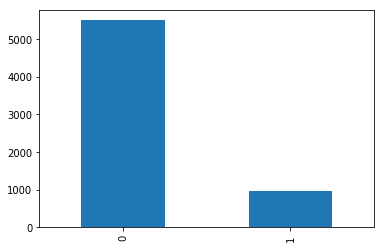

In [8]:
c_poor.value_counts().plot(kind='bar')

In [9]:
from util import *
print("Country C")
cols=[i for i in c_train.columns if i not in ['id','poor']]


cX_train = pre_process_data(c_train.loc[:,cols])
cy_train = np.ravel(c_poor)

print("\nCountry C test")

cX_test=pre_process_data(c_test.loc[:,cols],enforce_cols=cX_train.columns)


print(cX_train.shape,cX_test.shape)
cX_train.head()

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)

Country C test
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)
(6469, 795) (3187, 795)


LhUIIEHQ  PNAiwXUz  jmsRIiqp  NONtAKOM  kLAQgdly  WWuPOkor  CtFxPQPT  \
0 -0.606739 -0.350340 -0.313847 -0.310077 -0.704307  0.524039  0.380397   
1 -0.606739  3.907434 -0.313847  0.249445 -0.390493  0.524039 -3.296468   
2  0.742520 -0.299653  0.449989  0.808967  1.004237  0.524039  0.380397   
3  0.742520 -0.350340 -1.077683  0.808967  1.004237  0.524039  0.292852   
4  0.742520  0.004474  0.449989 -0.310077 -0.094113 -1.142633  0.424169   

   GIwNbAsH  qLDzvjiU  detlNNFh       ...        obIQUcpS_YXwVA  \
0  0.026222 -0.249567 -0.127064       ...                     1   
1  0.026222 -0.249567 -0.127064       ...                     0   
2 -0.444972  0.541055 -0.127064       ...                     1   
3 -0.444972 -1.040189 -0.127064       ...                     1   
4 -0.444972 -0.249567  0.184764       ...                     0   

   lAvdypjD_SnGME  lAvdypjD_UUKOE  lAvdypjD_gWylU  lAvdypjD_jSoky  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               1   

   ARWytYMz_NwjRA  ARWytYMz_herus  eqJPmiPb_Rrpos  eqJPmiPb_mORJu  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               0               1               0               0   

   eqJPmiPb_wnPqZ  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 795 columns]

In [10]:
from sklearn.feature_selection import VarianceThreshold
cX_train['poor']=c_poor

c_train_df=remove_feat_constants(cX_train)
c_train_df.drop('poor',axis=1,inplace=True)
cols=c_train_df.columns
c_test_df=cX_test.loc[:,cols]

Delete  Index([], dtype='object')
  - Deleted 0 / 796 features (~= 0.0 %)


In [11]:
print(c_train_df.shape,c_test_df.shape)

(6469, 795) (3187, 795)


# Fix imbalance

In [7]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(cy_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(cy_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(c_train_df, cy_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 973
Before OverSampling, counts of label '0': 5496 

After OverSampling, the shape of train_X: (10992, 795)
After OverSampling, the shape of train_y: (10992,) 

After OverSampling, counts of label '1': 5496
After OverSampling, counts of label '0': 5496


In [8]:
cX_train_smote=pd.DataFrame(X_train_res)
cY_train_smote=pd.DataFrame(y_train_res)
cX_train_smote.columns=c_train_df.columns
cY_train_smote.columns=['poor']
print(cX_train_smote.shape,cY_train_smote.shape)
X=cX_train_smote
y=cY_train_smote
y.poor.values

(10992, 795) (10992, 1)


array([0, 1, 1, ..., 1, 1, 1])

# #1. Tree Based Ranking



In [21]:
c_test_df.head()

LhUIIEHQ  PNAiwXUz  jmsRIiqp  NONtAKOM  kLAQgdly  WWuPOkor  CtFxPQPT  \
0  0.756899 -0.420743 -0.342818  0.819147  1.065812  0.523759  0.301324   
1  0.756899  1.127713  0.426050  0.819147 -1.013694  0.523759 -9.012596   
2 -0.612912 -0.313953  0.426050  0.819147  1.065812  0.523759  0.260293   
3 -0.612912 -0.207163 -0.342818  0.819147  0.230296  0.523759 -1.216804   
4  0.756899 -0.313953  0.426050  0.819147  0.026059  0.523759  0.342354   

   GIwNbAsH  qLDzvjiU  detlNNFh       ...        obIQUcpS_YXwVA  \
0  0.007565 -0.279542 -0.123344       ...                     0   
1  0.007565  0.525974 -0.123344       ...                     1   
2  0.972001  0.525974 -0.123344       ...                     1   
3  0.972001 -0.279542  1.085258       ...                     1   
4  0.489783  0.525974 -0.123344       ...                     1   

   lAvdypjD_SnGME  lAvdypjD_UUKOE  lAvdypjD_gWylU  lAvdypjD_jSoky  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               1   

   ARWytYMz_NwjRA  ARWytYMz_herus  eqJPmiPb_Rrpos  eqJPmiPb_mORJu  \
0               1               0               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               1               0               0   
4               1               0               1               0   

   eqJPmiPb_wnPqZ  
0               1  
1               1  
2               1  
3               1  
4               0  

[5 rows x 795 columns]

In [16]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append('/Users/priya/xgboost/python-package') 
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
X=c_train_df
y=c_poor
clf = ExtraTreesClassifier()

clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_test_new=model.transform(c_test_df)





#All features
def runAgainstClassifiers(X,y):
    Classifiers = [
                RandomForestClassifier(n_estimators=200),
                LogisticRegression(penalty='l1',C=1),
                LogisticRegression(penalty='l2',C=1),
                LogisticRegression(),
                LogisticRegression(C=0.1,solver='liblinear',max_iter=200),
                GradientBoostingClassifier(n_estimators=200),
                xgb.XGBClassifier()]


    skf = StratifiedKFold(n_splits=2,shuffle=True, random_state=42)
    log_loss_map={}

    for clf in Classifiers:

        log_loss_clf=[]
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
        print(clf.__class__.__name__,np.mean(log_loss_clf))
        log_loss_map[clf.__class__.__name__]=np.mean(log_loss_clf)
  
print("No feature selection")
runAgainstClassifiers(pd.DataFrame(X),y)



No feature selection
RandomForestClassifier 0.167209255391


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression 0.0952654528035
LogisticRegression 0.246391584005
LogisticRegression 0.246391584005
LogisticRegression 0.228019176123
GradientBoostingClassifier 0.0301199534897
XGBClassifier 0.0201867085757


# Tree based model FS

In [17]:
runAgainstClassifiers(pd.DataFrame(X_new),y)


RandomForestClassifier 0.135425743097


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression 0.0846102514878
LogisticRegression 0.213697636204
LogisticRegression 0.213697636204
LogisticRegression 0.230136017783
GradientBoostingClassifier 0.0300467831953
XGBClassifier 0.0201912787333


# L1 BASED

In [19]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model_2 = SelectFromModel(lsvc, prefit=True)
X_lasoo = model_2.transform(X)
X_test_lasoo=model_2.transform(c_test_df)

print("L1 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_lasoo),y)


L1 based feature selection
RandomForestClassifier 0.0833894793532


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression 0.0814888249211
LogisticRegression 0.181942726446
LogisticRegression 0.181942726446
LogisticRegression 0.219210233552
GradientBoostingClassifier 0.0446229350745
XGBClassifier 0.0346817421395


In [29]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X,y)
model_3 = SelectFromModel(lsvc, prefit=True)
X_ridge = model_3.transform(X)
X_test_ridge=model_3.transform(c_test_df)

print("L2 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_ridge),y)


L2 based feature selection
RandomForestClassifier 0.119420846682


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression 0.0788287294907
LogisticRegression 0.188964756769
LogisticRegression 0.188964756769
LogisticRegression 0.206585565647
GradientBoostingClassifier 0.0315394723459
XGBClassifier 0.0197145046265


In [30]:
m=xgb.XGBClassifier()
m.fit(X_ridge,y)
preds=m.predict_proba(X_test_ridge)

# Boruta

In [23]:
import sys
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced',max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(X.as_matrix(), y)

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)

feature_df = pd.DataFrame(X.columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))
boruta_feats=(feature_df.head(boruta_selector.n_features_)).features.tolist()


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	795
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	94
Tentative: 	43
Rejected: 	658


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	94
Tentative: 	43
Rejected: 	658


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	94
Tentative: 	43
Rejected: 	658


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	94
Tentative: 	43
Rejected: 	658


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	94
Tentative: 	33
Rejected: 	668


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	94
Tentative: 	31
Rejected: 	670


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	94
Tentative: 	31
Rejected: 	670


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	94
Tentative: 	31
Rejected: 	670


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	94
Tentative: 	28
Rejected: 	673


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	94
Tentative: 	21
Rejected: 	680


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	94
Tentative: 	21
Rejected: 	680


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	94
Tentative: 	21
Rejected: 	680


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	94
Tentative: 	21
Rejected: 	680


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	94
Tentative: 	16
Rejected: 	685


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	94
Tentative: 	16
Rejected: 	685


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	94
Tentative: 	16
Rejected: 	685


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	94
Tentative: 	16
Rejected: 	685


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	94
Tentative: 	14
Rejected: 	687


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	94
Tentative: 	14
Rejected: 	687


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	94
Tentative: 	9
Rejected: 	692


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	94
Tentative: 	9
Rejected: 	692


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	94
Tentative: 	8
Rejected: 	693


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	94
Tentative: 	8
Rejected: 	693


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	94
Tentative: 	8
Rejected: 	693


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	94
Tentative: 	4
Rejected: 	697


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	94
Tentative: 	3
Rejected: 	698


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699
Iteration: 	99 / 100
Confirmed: 	94
Tentative: 	2
Rejected: 	699


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	94
Tentative: 	0
Rejected: 	699

 Number of selected features:
94

 Top 94 features:
          features  rank
0         LhUIIEHQ     1
1   QdqcizGs_wOAjM     1
2   nomHWXYi_FQLhG     1
3   VbnOIDkC_CIYyV     1
4   VbnOIDkC_PNOcZ     1
5   DWPfClyc_hnjLj     1
6   vsdZwVFE_JghOQ     1
7   XYfcLBql_QuAbf     1
8   DWPfClyc_BlQQe     1
9   XYfcLBql_xyXNr     1
10  YmHrcUIw_qBfGj     1
11  YmHrcUIw_tmFea     1
12  qCEuAGDU_BEsCs     1
13  qCEuAGDU_bVPOI     1
14  pQGrypBw_OeoNx     1
15  pQGrypBw_XdlZk     1
16  laWlBVrk_cFDTU     1
17  wcNjwEuQ_IpfgT     1
18  KnVaKVhK_waOcH     1
19  kdkPWxwS_jtquj     1
20  kdkPWxwS_TfhFg     1
21  YACFXGNR_iKGGB     1
22  YACFXGNR_EPlyp     1
23  DTNyjXJp_XuMYE     1
24  nomHWXYi_prPlH     1
25  DTNyjXJp_zfhKi     1
26  ABnhybHK_sEJgr     1
27  yiuxBjHP_umyco   

/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [34]:
X_new_b=X.loc[:,boruta_feats]
X_test_b=c_test_df.loc[:,boruta_feats]
runAgainstClassifiers(pd.DataFrame(X_new_b),y)


RandomForestClassifier 0.087926877288


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression 0.0704159627027
LogisticRegression 0.195560033529
LogisticRegression 0.195560033529
LogisticRegression 0.239640130055
GradientBoostingClassifier 0.0326687983157
XGBClassifier 0.0192535579273


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

def modelfit(alg, dtrain,y ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    #Fit the algorithm on the data
    alg.fit(dtrain, y,eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("accuracy Score (Train): %f" % accuracy_score(y, dtrain_predictions))
    print ("logloss Score (Train): %f" % log_loss(y, dtrain_predictions))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
   
xgb1 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=3,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1

skf = StratifiedKFold(n_splits=2,shuffle=True, random_state=42)


log_loss_clf=[]
for train_index, test_index in skf.split(X_new_b,y):
            X_train, X_test = X_new_b.iloc[train_index], X_new_b.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            xgb1.fit(X_train,y_train)
            pred1=(xgb1.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(np.mean(log_loss_clf))
  

0.0188543102085


In [85]:
param_test1 = {
'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=1, gamma=0.3, subsample=0.7, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='log_loss',cv=5,verbose=2)
gsearch1.fit(X_new_b,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] colsample_bytree=0.6, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=   1.5s
[CV] colsample_bytree=0.6, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=   1.8s
[CV] colsample_bytree=0.6, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=   1.8s
[CV] colsample_bytree=0.6, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=   1.4s
[CV] colsample_bytree=0.6, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=   1.4s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.7, total=   1.6s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.7, total=   1.6s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.7, total=   2.0s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.7, total=   2.2s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.8, total=   1.9s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.8, total=   1.9s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.8, total=   1.8s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.8, total=   2.2s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.8, total=   1.8s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.9, total=   2.0s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.9, total=   2.0s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.9, total=   2.5s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.9, total=   1.8s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.6, subsample=0.9, total=   1.7s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.6, total=   1.3s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.6, total=   1.6s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.6, total=   1.2s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.6, total=   1.6s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.6, total=   1.8s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.7, total=   1.6s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.7, total=   1.9s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.7, total=   2.2s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.7, total=   1.9s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   2.2s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   1.5s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   1.7s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   1.5s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.8, total=   1.5s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   1.7s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   1.6s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   1.6s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   2.1s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.7, subsample=0.9, total=   1.7s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.6, total=   1.5s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.6, total=   1.7s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.6, total=   2.6s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.6, total=   2.5s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.6, total=   1.7s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.7, total=   1.7s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.7, total=   2.3s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.7, total=   1.3s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.7, total=   2.0s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.7, total=   1.4s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.8, total=   1.5s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.8, total=   2.0s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.8, total=   2.8s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.8, total=   3.5s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.8, total=   2.2s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.9, total=   2.3s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.9, total=   2.0s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.9, total=   1.8s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.9, total=   2.1s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.8, subsample=0.9, total=   1.6s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.6, total=   1.6s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.6, total=   1.4s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.6, total=   2.1s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.6, total=   1.9s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.6, total=   1.6s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.7, total=   2.0s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.7, total=   2.3s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.7, total=   2.0s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.7, total=   2.1s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.7, total=   2.5s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.8, total=   2.6s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.8, total=   3.0s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.8, total=   2.9s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.8, total=   2.5s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.8, total=   2.7s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.9, total=   2.1s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.9, total=   2.1s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.9, total=   2.3s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV] .............. colsample_bytree=0.9, subsample=0.9, total=   2.7s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


[CV] .............. colsample_bytree=0.9, subsample=0.9, total=   1.9s


/Users/priya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.01771, std: 0.00815, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -0.01769, std: 0.00793, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -0.01819, std: 0.00808, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -0.01873, std: 0.00846, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -0.01695, std: 0.00804, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -0.01700, std: 0.00761, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -0.01804, std: 0.00827, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -0.01783, std: 0.00808, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -0.01697, std: 0.00762, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -0.01663, std: 0.00748, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -0.01708, std: 0.00745, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.01740, std: 0.00770, params: {'colsample_bytree': 0.8,

In [87]:
A=pd.read_csv("A.csv")
B=pd.read_csv("B.csv")
C=pd.read_csv("C.csv")

pd.concat([A,B,C]).to_csv("all1.csv",index=False)

In [97]:
xgb1.fit(X_new_b,y)
preds=xgb1.predict_proba(X_test_b)[:,1]
df=pd.DataFrame()
df['id']=c_test_id
df['country']='C'
df['poor']=preds
df.to_csv("C.csv",index=False,columns=['id','country','poor'])

In [70]:
c_test_id

0        6211
1       77549
2       34834
3       74650
4       65375
5       68425
6        6142
7       95572
8       73658
9       31069
10       9024
11      27893
12      74166
13      47343
14      21254
15      64173
16      76702
17      70905
18      59402
19       3184
20      60940
21       5321
22      53921
23      22329
24      64979
25      62337
26      28357
27      94493
28      67078
29      15625
        ...  
3157    51512
3158    52284
3159     2281
3160    50913
3161    37129
3162    64351
3163    89726
3164    91465
3165    30676
3166    98493
3167    88475
3168    96504
3169    51200
3170    94912
3171     7588
3172    35668
3173     6137
3174    87474
3175    99992
3176     8544
3177    63899
3178    72790
3179     1588
3180      254
3181    68171
3182     6775
3183    88300
3184    35424
3185    81668
3186    98377
Name: id, dtype: int64